In [1]:
import pandas as pd

In [ ]:
# 데이터 불러오기

In [4]:
train = pd.read_csv('./data/lspoons_train.csv')

In [5]:
test = pd.read_csv('./data/lspoons_test.csv')

In [6]:
store = pd.read_csv('./data/store.csv')

# 1. 변수 확인

In [258]:
train.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,...,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,14929,85,2015-05-01,2015,5,4,1,0,0,1,...,11360,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
1,14930,512,2015-05-01,2015,5,4,1,0,0,1,...,10534,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
2,14931,1097,2015-05-01,2015,5,4,1,0,0,1,...,17039,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN
3,14932,1,2015-04-30,2015,4,3,1,0,1,0,...,6228,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,14933,9,2015-04-30,2015,4,3,1,0,1,0,...,9717,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [15]:
test.head()

,id,Store,Date,Promo,StateHoliday,SchoolHoliday
0,0,1,2015-07-01,1,0,0
1,1,9,2015-07-01,1,0,1
2,2,11,2015-07-01,1,0,0
3,3,12,2015-07-01,1,0,0
4,4,14,2015-07-01,1,0,1


In [256]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
train['StateHoliday'].value_counts()

0    62208
a       18
b       13
c        5
Name: StateHoliday, dtype: int64

# 1-1. 원핫인코딩

In [17]:
train = pd.get_dummies(data = train, columns=['StateHoliday'])
test = pd.get_dummies(data = test, columns=['StateHoliday'])

In [18]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [19]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


In [20]:
# test데이터에 없는 데이터 생성

test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

In [21]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,1,0,1,0,0,0
1,1,9,2015-07-01,1,1,1,0,0,0
2,2,11,2015-07-01,1,0,1,0,0,0
3,3,12,2015-07-01,1,0,1,0,0,0
4,4,14,2015-07-01,1,1,1,0,0,0


# 2. 변수를 이용한 FE

In [242]:
# Datetime 으로 변환

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62244 entries, 0 to 62243
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              62244 non-null  int64         
 1   Store           62244 non-null  int64         
 2   Date            62244 non-null  datetime64[ns]
 3   Sales           62244 non-null  int64         
 4   Promo           62244 non-null  int64         
 5   SchoolHoliday   62244 non-null  int64         
 6   StateHoliday_0  62244 non-null  uint8         
 7   StateHoliday_a  62244 non-null  uint8         
 8   StateHoliday_b  62244 non-null  uint8         
 9   StateHoliday_c  62244 non-null  uint8         
dtypes: datetime64[ns](1), int64(5), uint8(4)
memory usage: 3.1 MB


In [29]:
# 년, 월, 요일 컬럼 추가
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['weekday'] = train['Date'].dt.weekday

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['weekday'] = test['Date'].dt.weekday

In [30]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,year,month,weekday
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,2015,5,4
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,2015,5,4
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,2015,5,4
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,2015,4,3
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,2015,4,3


In [42]:
train = train[['id', 'Store', 'Date','year', 'month', 'weekday','Promo', 'SchoolHoliday','StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c','Sales']]
test = test[['id', 'Store', 'Date','year', 'month', 'weekday', 'Promo', 'SchoolHoliday','StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']]

In [43]:
test.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,2015,7,2,1,0,1,0,0,0
1,1,9,2015-07-01,2015,7,2,1,1,1,0,0,0
2,2,11,2015-07-01,2015,7,2,1,0,1,0,0,0
3,3,12,2015-07-01,2015,7,2,1,0,1,0,0,0
4,4,14,2015-07-01,2015,7,2,1,1,1,0,0,0


In [49]:
train.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
0,14929,85,2015-05-01,2015,5,4,1,0,0,1,0,0,11360
1,14930,512,2015-05-01,2015,5,4,1,0,0,1,0,0,10534
2,14931,1097,2015-05-01,2015,5,4,1,0,0,1,0,0,17039
3,14932,1,2015-04-30,2015,4,3,1,0,1,0,0,0,6228
4,14933,9,2015-04-30,2015,4,3,1,0,1,0,0,0,9717


# 3. 베이스라인 모델링

In [47]:
train.columns

Index(['id', 'Store', 'Date', 'year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Sales'],
      dtype='object')

In [45]:
from xgboost import XGBRegressor

In [46]:
xgb = XGBRegressor(n_estimators= 300, learing_rate=0.1, random_state=2020)

In [50]:
# 모든 변수 활용

xgb.fit(train[['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c']],train['Sales'] )

[17:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learing_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=12,
             num_parallel_tree=1, random_state=2020, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
test['Sales'] = xgb.predict(test[['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c']])

In [54]:
test.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
0,0,1,2015-07-01,2015,7,2,1,0,1,0,0,0,8925.233398
1,1,9,2015-07-01,2015,7,2,1,1,1,0,0,0,9572.362305
2,2,11,2015-07-01,2015,7,2,1,0,1,0,0,0,8925.233398
3,3,12,2015-07-01,2015,7,2,1,0,1,0,0,0,8925.233398
4,4,14,2015-07-01,2015,7,2,1,1,1,0,0,0,9572.362305


In [57]:
# 캐글 제출 형식으로 만들어서 저장

test[['id', 'Sales']].to_csv('submission', index=False)

# 4. 변수 선택

In [59]:
xgb.feature_importances_

array([7.6124713e-02, 8.7538145e-02, 9.7475305e-02, 6.4770091e-01,
       5.8995668e-02, 1.7860070e-02, 1.2227211e-02, 1.9866596e-03,
       9.1438196e-05], dtype=float32)

In [87]:
input_var = ['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c']

In [88]:
imp_df = pd.DataFrame({'var' : input_var,
                      'imp' : xgb.feature_importances_})

In [89]:
imp_df = imp_df.sort_values('imp', ascending=False)

In [90]:
imp_df

,var,imp
3,Promo,0.647701
2,weekday,0.097475
1,month,0.087538
0,year,0.076125
4,SchoolHoliday,0.058996
5,StateHoliday_0,0.017860
6,StateHoliday_a,0.012227
7,StateHoliday_b,0.001987
8,StateHoliday_c,0.000091


In [91]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

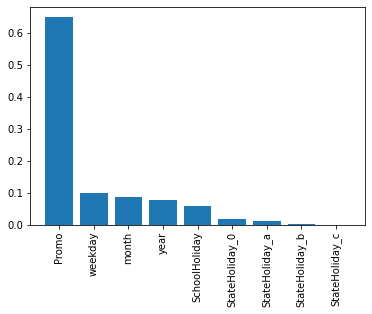

In [92]:
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation=90)

### 4-1. 상위 몇 개의 변수를 활용하는 것이 좋을까?

In [101]:
input_var = ['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c']

In [83]:
from sklearn.model_selection import cross_val_score

In [128]:
import numpy as np

In [140]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring = 'neg_mean_squared_error', cv=3)

[19:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in la

array([ -7448658.97398913, -10175024.04723666,  -7602674.75120161])

In [230]:
score_list=[]

for i in range(1, 10):
    selected_var = imp_df['var'].iloc[:i].tolist()
    score = cross_val_score(xgb,
                          train[selected_var], 
                          train['Sales'], 
                          scoring = 'neg_mean_squared_error',
                          cv=3)
    score_list.append(-np.mean(score))
    
    
    

[21:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in la

[21:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in la

In [231]:
score_list

[8385401.219881013,
 8164050.475999958,
 8243654.375359175,
 8243654.375359175,
 8405863.801426692,
 8449041.571541054,
 8425117.646892156,
 8465761.183517465,
 8406170.679318883]

ValueError: x and y must have same first dimension, but have shapes (9,) and (34,)

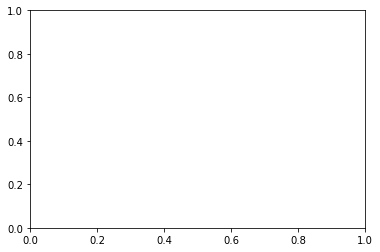

In [321]:
# 상위 2개의 변수를 사용했을 때 에러가 가장 낮은 것을 알 수 있음

plt.plot(range(1,10), score_list)

In [235]:
xgb.fit(train[['Promo', 'weekday']], train['Sales'])

[21:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learing_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=12,
             num_parallel_tree=1, random_state=2020, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [237]:
test['Sales'] = xgb.predict(test[['Promo','weekday']])

In [238]:
test.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
0,0,1,2015-07-01,2015,7,2,1,0,1,0,0,0,7939.037598
1,1,9,2015-07-01,2015,7,2,1,1,1,0,0,0,7939.037598
2,2,11,2015-07-01,2015,7,2,1,0,1,0,0,0,7939.037598
3,3,12,2015-07-01,2015,7,2,1,0,1,0,0,0,7939.037598
4,4,14,2015-07-01,2015,7,2,1,1,1,0,0,0,7939.037598


In [240]:
test[['id','Sales']].to_csv('submission2', index=False)

# 5. Store 데이터 활용

In [244]:
# 데이터 병합

train = pd.merge(train, store, on='Store', how='left')
test = pd.merge(test, store, on='Store', how='left')

In [264]:
train['Assortment'].value_counts()

a    31949
c    29900
b      395
Name: Assortment, dtype: int64

In [259]:
xgb = XGBRegressor(n_estimator=300, learning_rate=0.1, random_state=2020)

In [286]:
test.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0,1,2015-07-01,2015,7,2,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1,9,2015-07-01,2015,7,2,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,11,2015-07-01,2015,7,2,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
3,3,12,2015-07-01,2015,7,2,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,4,14,2015-07-01,2015,7,2,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [274]:
# 병합한 store 데이터 항목 원핫인코딩

train = pd.get_dummies(data=train, columns=['StoreType'])
train = pd.get_dummies(data=train, columns=['Assortment'])

test = pd.get_dummies(data=test, columns=['StoreType'])
test = pd.get_dummies(data=test, columns=['Assortment'])

train = pd.get_dummies(data=train, columns=['PromoInterval'])
test = pd.get_dummies(data=test, columns=['PromoInterval'])


In [285]:
train.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,14929,85,2015-05-01,2015,5,4,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,14930,512,2015-05-01,2015,5,4,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,14931,1097,2015-05-01,2015,5,4,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,14932,1,2015-04-30,2015,4,3,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,14933,9,2015-04-30,2015,4,3,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62244 entries, 0 to 62243
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              62244 non-null  int64         
 1   Store                           62244 non-null  int64         
 2   Date                            62244 non-null  datetime64[ns]
 3   year                            62244 non-null  int64         
 4   month                           62244 non-null  int64         
 5   weekday                         62244 non-null  int64         
 6   Promo                           62244 non-null  int64         
 7   SchoolHoliday                   62244 non-null  int64         
 8   StateHoliday_0                  62244 non-null  uint8         
 9   StateHoliday_a                  62244 non-null  uint8         
 10  StateHoliday_b                  62244 non-null  uint8         
 11  St

# 5-1. Store 데이터의 변수 중요도 확인

In [297]:
xgb = XGBRegressor(n_estimator=300, learning_rate=0.1, random_state=2020)

In [307]:
xgb.fit(train[['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c','CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']],train['Sales'] )

[22:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=300, n_estimators=100, n_jobs=12, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [308]:
xgb.predict(test[['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']])

array([7943.4536, 9312.376 , 9109.008 , ..., 4315.    , 8172.7944,
       6367.37  ], dtype=float32)

In [309]:
# Store의 변수 중요도

xgb.feature_importances_

array([0.01251515, 0.03010304, 0.02816474, 0.13736537, 0.02601912,
       0.0072719 , 0.        , 0.00183144, 0.        , 0.06263886,
       0.06849034, 0.05565386, 0.09622575, 0.05671235, 0.05544062,
       0.04543076, 0.01498386, 0.0406484 , 0.03597142, 0.05800252,
       0.00567689, 0.05978252, 0.02806253, 0.02669439, 0.04631423],
      dtype=float32)

In [312]:
input_var = ['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c','CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']

In [313]:
# 변수 중요도 내림차순으로 정리

imp_df = pd.DataFrame({'var' : input_var,
                      'imp' : xgb.feature_importances_})

imp_df = imp_df.sort_values('imp', ascending=False)

imp_df

,var,imp
3,Promo,0.137365
12,Promo2,0.096226
10,CompetitionOpenSinceMonth,0.068490
9,CompetitionDistance,0.062639
21,Assortment_c,0.059783
19,Assortment_a,0.058003
13,Promo2SinceWeek,0.056712
11,CompetitionOpenSinceYear,0.055654
14,Promo2SinceYear,0.055441
24,"PromoInterval_Mar,Jun,Sept,Dec",0.046314


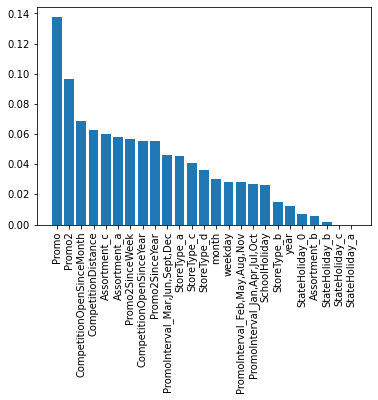

In [314]:
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

In [324]:
# 교차 검증을 통해 몇 개의 변수를 사용할 때 에러가 낮아지는지 확인

score_list2 = []

for i in range(1,26):
    imp_df2 = imp_df['var'][:i].tolist()
    score = cross_val_score(xgb,
                          train[imp_df2], 
                          train['Sales'], 
                          scoring = 'neg_mean_squared_error',
                          cv=3)
    score_list2.append(-np.mean(score))
    print(i)

[22:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[22:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


8
[22:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in lan

[22:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


15
[22:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in la

22
[22:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in la

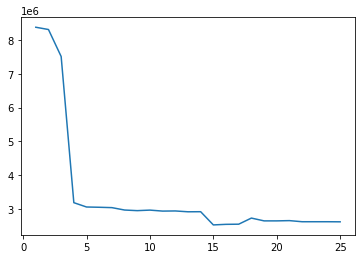

In [327]:
# 변수가 15개 일 때 에러가 가장 낮은 것을 확인

plt.plot(range(1,26), score_list2)

In [ ]:
xgb.fit(train[['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c','CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']],train['Sales'] )

xgb.predict(test[['year', 'month', 'weekday', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']])

In [360]:
imp_df['var'].iloc[:15].tolist()

['Promo',
 'Promo2',
 'CompetitionOpenSinceMonth',
 'CompetitionDistance',
 'Assortment_c',
 'Assortment_a',
 'Promo2SinceWeek',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'StoreType_a',
 'StoreType_c',
 'StoreType_d',
 'month',
 'weekday']

In [361]:
xgb.fit(train[imp_df['var'].iloc[:15].tolist()], train['Sales'])

[23:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=300, n_estimators=100, n_jobs=12, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [363]:
test['Sales'] = xgb.predict(test[imp_df['var'].iloc[:15].tolist()])

In [366]:
test.head()

,id,Store,Date,year,month,weekday,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0,1,2015-07-01,2015,7,2,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1,9,2015-07-01,2015,7,2,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,11,2015-07-01,2015,7,2,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
3,3,12,2015-07-01,2015,7,2,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,4,14,2015-07-01,2015,7,2,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [369]:
test[['id', 'Sales']].to_csv('Submission3', index=False)

# 6. 파라미터 튜닝

In [370]:
estimat_list = [100,200,300,400,500,600,700,800,900]
score_list = []

In [372]:
for i in estimat_list:
    xgb = XGBRegressor(n_estimators=i, learning_rate=0.1, random_state=2020)
    score = cross_val_score(xgb, train[imp_df['var'].iloc[:15].tolist()], train['Sales'], scoring='neg_mean_squared_error', cv=3)
    score_list.append(-np.mean(score))
    print(i)

100
200
300
400
500
600
700
800
900


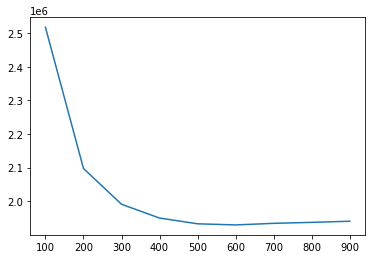

In [373]:
plt.plot(estimat_list, score_list)

In [374]:
# n_estimators 가 600일 때

xgb = XGBRegressor(n_estimators=600, learning_rate=0.1, random_state=2020)

In [379]:
xgb.fit(train[imp_df['var'].iloc[:15].tolist()], train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=12, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [380]:
test['Sales'] = xgb.predict(test[imp_df['var'].iloc[:15].tolist()])

In [381]:
test[['id', 'Sales']].to_csv('submission4', index=False)